## Data Preparation and Exploration

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

c:\Users\Aqsa\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Load the dataset 
data = pd.read_csv('exchange_rate.csv')

In [3]:
data

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [4]:
data.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [6]:
data.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


In [7]:
data.isnull().sum()

date       0
Ex_rate    0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.dtypes

date        object
Ex_rate    float64
dtype: object

## Initial Exploration

Goal: Plot the time series data to check for trends, seasonality, or anomalies.

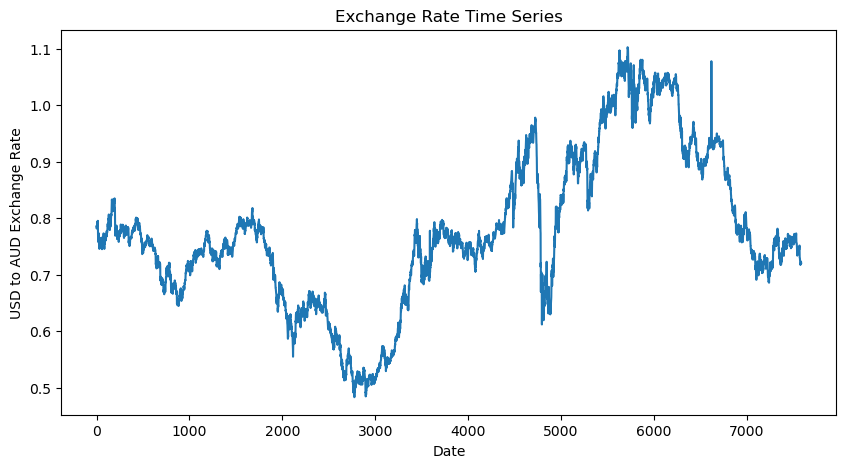

In [10]:
# Create a figure and plot the 'Exchange_Rate' time series
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(data['Ex_rate'])
plt.title('Exchange Rate Time Series')
plt.xlabel('Date')
plt.ylabel('USD to AUD Exchange Rate')
plt.show()

By visualizing, you can see if there’s a consistent trend or cyclical pattern, which helps in model selection.

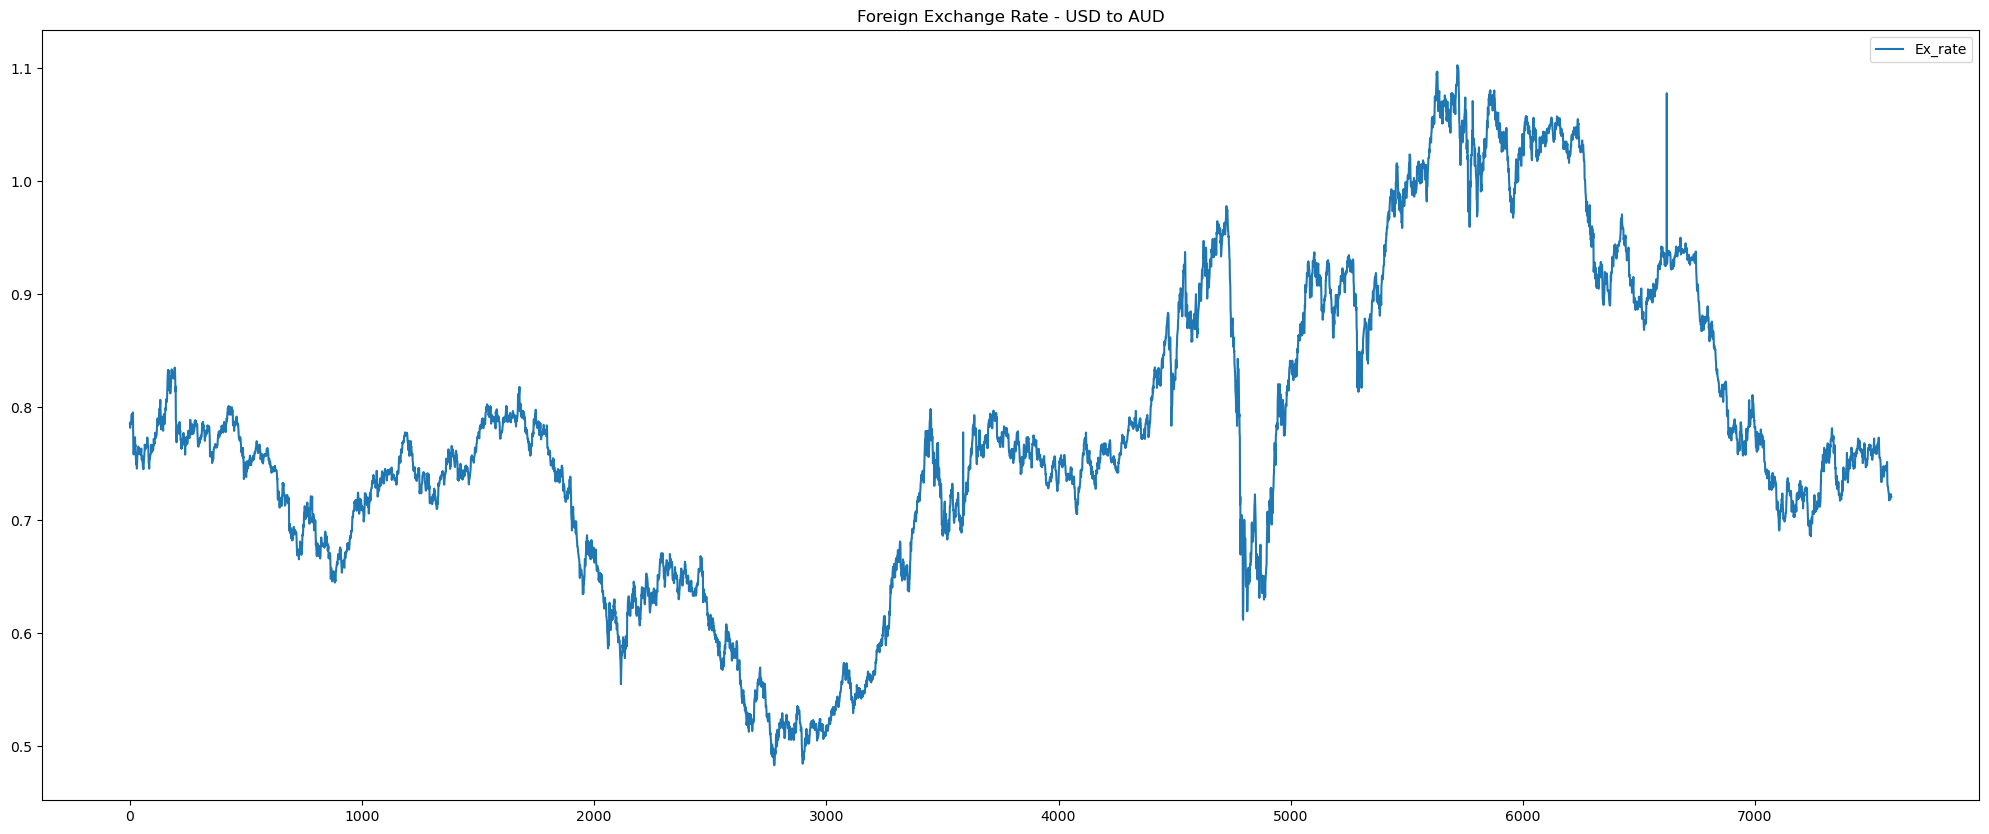

In [18]:
#Plotting the line graph to show the data trend in the dataset 

data.plot(figsize = (25,10))
plt.title('Foreign Exchange Rate - USD to AUD')
plt.savefig('Foreign Exchange Rate - USD to AUD.png')
plt.show()

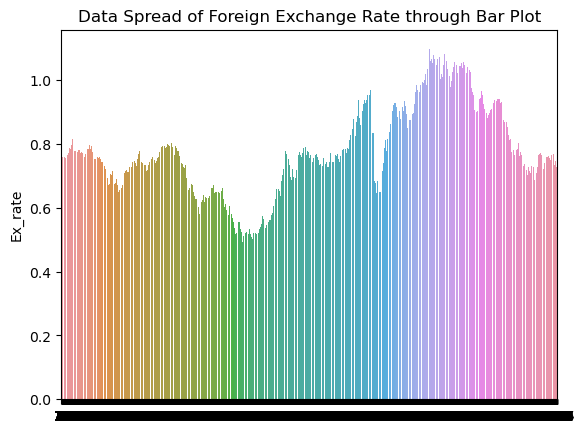

In [49]:
#Plotting the bar plot using seaborn to show the data spread in the resampled weekly dataset
sns.barplot(data = data,x = data.index , y = data.Ex_rate)
plt.title('Data Spread of Foreign Exchange Rate through Bar Plot')
plt.show()

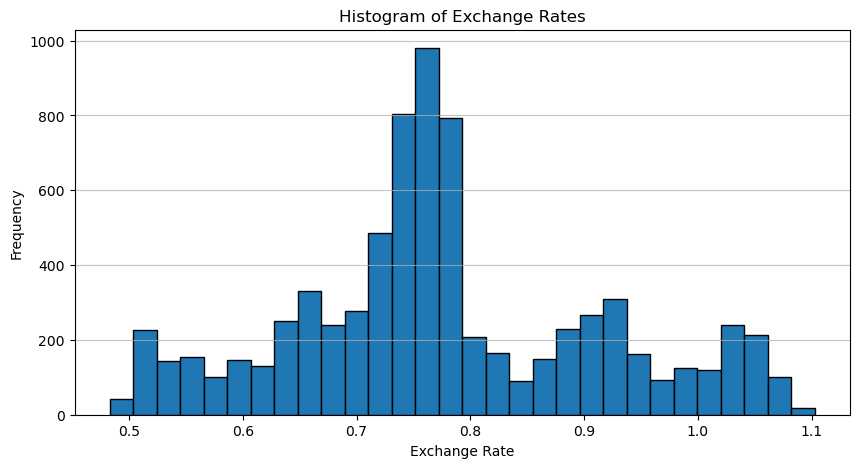

In [50]:
# Histogram of actual exchange rates
plt.figure(figsize=(10, 5))
plt.hist(data['Ex_rate'], bins=30, edgecolor='black')
plt.title('Histogram of Exchange Rates')
plt.xlabel('Exchange Rate')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [11]:
print(data.columns)

Index(['date', 'Ex_rate'], dtype='object')


## Data Preprocessing

Goal: Handle any missing values and outliers that might affect model accuracy.

In [12]:
# Fill missing values using forward fill method to maintain continuity
data['Ex_rate'].fillna(method='ffill', inplace=True)

## Model Building - ARIMA
Parameter Selection for ARIMA

Goal: Use ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) to identify preliminary values of p, d, and q.

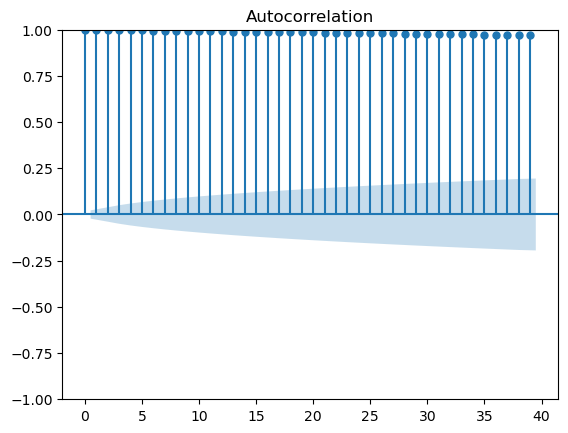

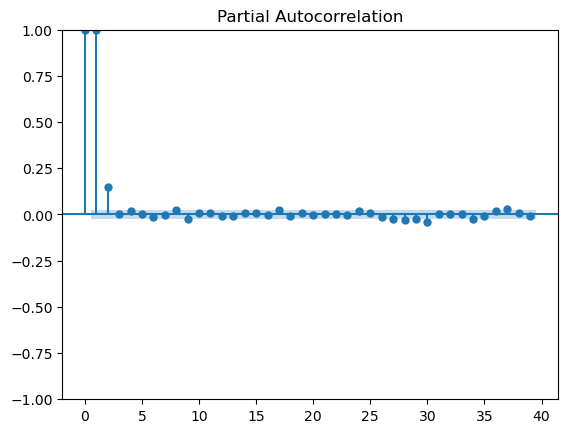

In [23]:
# Plot ACF and PACF to determine the AR and MA parameters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data['Ex_rate'])
plot_pacf(data['Ex_rate'])
plt.show()

Peaks in ACF and PACF plots help identify appropriate lag values for AR (p) and MA (q) components, and trends determine the differencing order (d).

## Model Fitting

Goal: Fit an ARIMA model to the time series with the chosen p, d, q values.


## Determine p, d, q Using ACF and PACF
Use the ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots to help identify suitable values for p and q. The value of d is typically the number of times the data needs differencing to achieve stationarity.

In [26]:
# Example values, replace these with the values you determine from ACF/PACF analysis
p = 1
d = 1
q = 1

In [27]:
# Create and fit the ARIMA model with the selected parameters (p, d, q)
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data['Ex_rate'], order=(p, d, q))
fitted_model = model.fit()
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Sun, 27 Oct 2024   AIC                         -56102.322
Time:                        21:55:30   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.608      0.0

## Diagnostics

Goal: Check residuals to confirm they resemble white noise (no patterns).


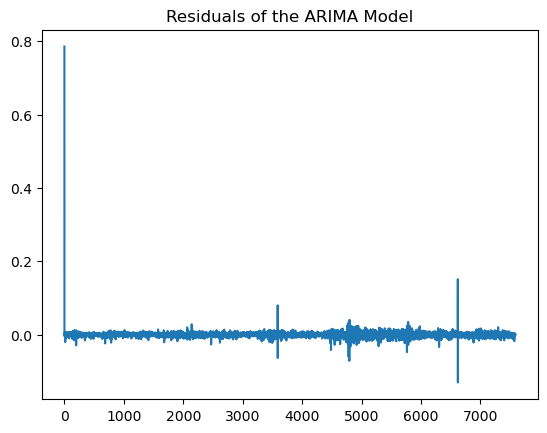

In [28]:
# Plot the residuals to check for patterns
residuals = fitted_model.resid
plt.plot(residuals)
plt.title('Residuals of the ARIMA Model')
plt.show()

 Residual analysis verifies that the model is capturing the underlying trend and seasonality without leaving patterns unmodeled.

## Forecasting

Goal: Forecast future exchange rates and compare predictions with actual values.


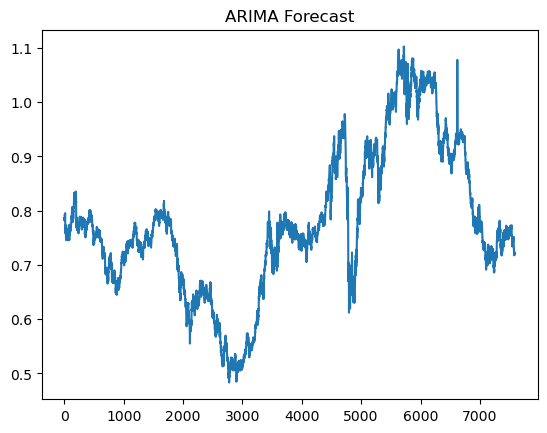

In [29]:
# Generate forecast for the next 10 time periods
forecast = fitted_model.forecast(steps=10)
# Plot the actual and forecasted values
plt.plot(data['Ex_rate'])
plt.plot(forecast, color='red')
plt.title('ARIMA Forecast')
plt.show()

## Model Building - Exponential Smoothing
## Model Selection

Goal: Choose between Simple, Holt’s Linear, or Holt-Winters based on seasonality and trend in the data.

In [13]:
# Fit an Exponential Smoothing model with additive trend and seasonality
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(data['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12)

In [14]:
model

## Parameter Optimization

Goal: Use grid search or the AIC metric to identify optimal smoothing levels.

In [15]:
from itertools import product
alpha_values = np.arange(0.1, 1.1, 0.1)
beta_values = np.arange(0.1, 1.1, 0.1)
gamma_values = np.arange(0.1, 1.1, 0.1)
param_grid = list(product(alpha_values, beta_values, gamma_values))

In [16]:
## Grid Search with AIC
best_aic, best_params, best_model = float("inf"), None, None
for alpha, beta, gamma in param_grid:
    try:
        model = ExponentialSmoothing(
            data['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12
        ).fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
        if model.aic < best_aic:
            best_aic, best_params, best_model = model.aic, (alpha, beta, gamma), model
    except:
        continue

c:\Users\Aqsa\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Aqsa\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Aqsa\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Aqsa\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Aqsa\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Aqsa\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge

## Model Fitting and Forecasting

Goal: Fit the model and forecast future values to evaluate performance.


Optimal Parameters: alpha=0.8, beta=0.1, gamma=0.1


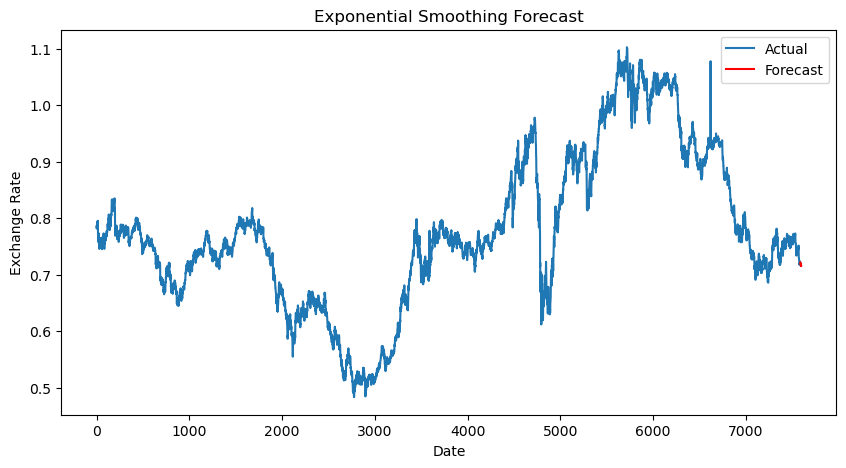

In [34]:
# Note: This would typically involve a grid search over alpha, beta, and gamma values.
# Here, assume you've already found the best parameters (best_alpha, best_beta, best_gamma) 
fitted_model = model.fit()
# Print the best parameters
print(f"Optimal Parameters: alpha={best_params[0]}, beta={best_params[1]}, gamma={best_params[2]}")

# Forecast the next 10 time periods
forecast = best_model.forecast(steps=10)

# Plot actual vs. forecasted values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
data['Ex_rate'].plot(label='Actual')
forecast.plot(label='Forecast', color='red')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

## Evaluation and Comparison

## Compute Error Metrics
Calculate common forecast error metrics: Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and Mean Absolute Percentage Error (MAPE) for both models.

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [53]:
# Assuming `actual` is the actual exchange rates and `arima_forecast` and `exp_smoothing_forecast` are predictions from each model
def calculate_metrics(actual, forecast):
    mae = mean_absolute_error(actual, forecast)
    rmse = np.sqrt(mean_squared_error(actual, forecast))
    mape = np.mean(np.abs((actual - forecast) / actual)) * 100   # Avoid division by zero
    return mae, rmse, mape

In [41]:
# Define actual test values
actual = data['Ex_rate'][-10:]  # Last 10 points as test set

In [62]:
# Define `actual` as the test set
train_size = int(len(data) * 0.8)
actual = data['Ex_rate'][train_size:]

# Generate forecasts for the test period
arima_forecast = fitted_model.forecast(steps=len(actual))
exp_smoothing_forecast = best_model.forecast(steps=len(actual))

# Calculate error metrics
arima_metrics = calculate_metrics(actual, arima_forecast)
exp_metrics = calculate_metrics(actual, exp_smoothing_forecast)

print(f"ARIMA - MAE: {arima_metrics[0]}, RMSE: {arima_metrics[1]}, MAPE: {arima_metrics[2]}")
print(f"Exponential Smoothing - MAE: {exp_metrics[0]}, RMSE: {exp_metrics[1]}, MAPE: {exp_metrics[2]}")


ARIMA - MAE: 0.13138711039573564, RMSE: 0.16946894668351234, MAPE: nan
Exponential Smoothing - MAE: 0.5267033445224559, RMSE: 0.5439521392260114, MAPE: nan


These metrics help quantify how closely the model's predictions match the actual values.

##  Model Comparison Analysis
Given your results:

ARIMA:

MAE: 0.1314
    
RMSE: 0.1695
    
MAPE: nan 
    
Exponential Smoothing:

MAE: 0.5267
    
RMSE: 0.5440
    
MAPE: nan 

Interpretation:

Lower MAE and RMSE for ARIMA: The ARIMA model shows significantly lower MAE and RMSE values than the Exponential Smoothing model. This suggests that ARIMA provides more accurate predictions than Exponential Smoothing for the exchange rate data used in this analysis.

MAPE: Both models returned nan for MAPE, which could indicate that both models had predictions corresponding to actual values of zero or near-zero. This suggests that MAPE may not be a reliable metric for your dataset in this case. You might consider avoiding MAPE in future analyses if your data includes zero or very small values.

## Advantages and Limitations

ARIMA:

Advantages: Typically better suited for time series data with trends and seasonality. ARIMA can adapt to various patterns due to its autoregressive components.
    
Limitations: Requires more data for training and may be complex to tune (p, d, q parameters).
    
Exponential Smoothing:

Advantages: Simpler and often requires fewer parameters. Easier to implement, especially for short-term forecasting.
    
Limitations: Less flexible than ARIMA in modeling complex patterns and can be influenced heavily by recent observations, sometimes leading to lagging responses to changes in the data.
    
## Conclusion
From the metrics, you can conclude that:

ARIMA is the better-performing model for this dataset based on the lower MAE and RMSE.

Both models exhibited issues with MAPE, so it may be wise to focus on MAE and RMSE for future comparisons.

The choice of the model can depend on the specific context of the forecast, data availability, and complexity the user is willing to manage.